<a href="https://colab.research.google.com/github/waltermayor/DigitalImageProcessing_colab/blob/master/clase4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# importar librerias necesarias 

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

path='/content/drive/My Drive/colab/images/'
os.chdir(path)
!pwd

# graficar imagenes estaticas en el notebook
%matplotlib inline  

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/colab/images


**Funciones**

In [0]:
def readRGB(imgPath):
    img = cv2.imread(imgPath)
    img =cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

#**Histogramas**

## Histograma escala de **grices**

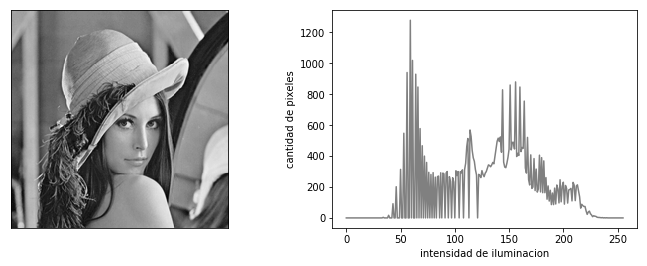

In [4]:
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(img,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.plot(hist, color='gray' )
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()



## **Hitrograma imagen a color**

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


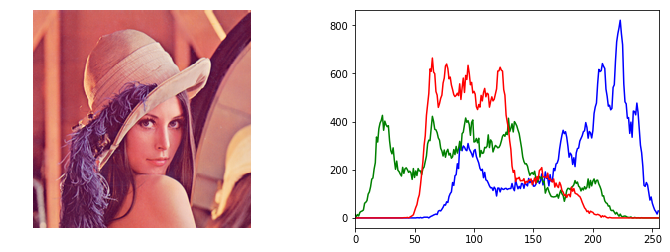

In [11]:
img = readRGB('lena.png')
color = ('b','g','r')

plt.figure(figsize=(12,4))
plt.subplot(1,2,1), plt.imshow(img)
plt.axis("off")

for i, c in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.subplot(1,2,2),plt.plot(hist, color = c)
    plt.xlim([0,256])
    

plt.show()



## **Hitrograma con alto brillo (mucha luz)**

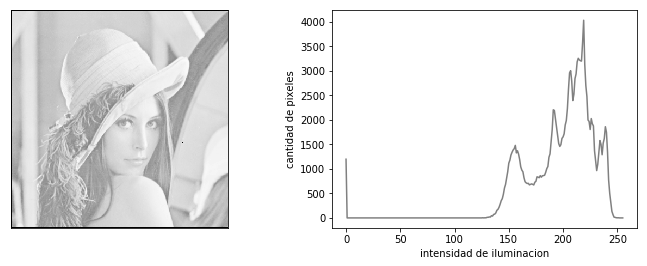

In [18]:
img = cv2.imread('lenaB.png', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(img,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.plot(hist, color='gray' )
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()


Histograma con poco brillo (poca luz)

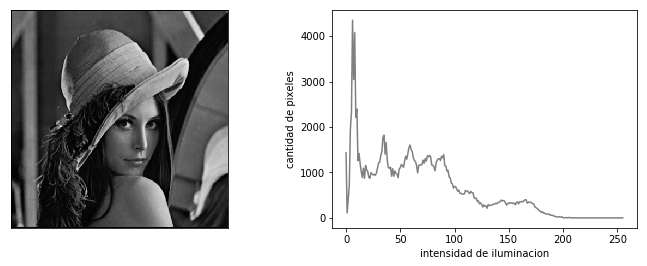

In [19]:
img = cv2.imread('lenaD.png', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(img,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.plot(hist, color='gray' )
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()

## **Imagen con mucho brillo equalizada**

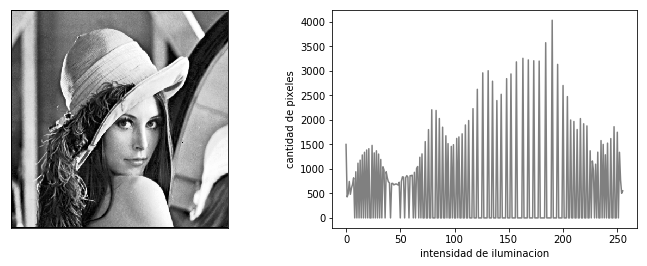

In [20]:
img = cv2.imread('lenaB.png', cv2.IMREAD_GRAYSCALE)
img = cv2.equalizeHist(img)

hist = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(img,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.plot(hist, color='gray' )
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()

## **Imagen oscura equalizada**

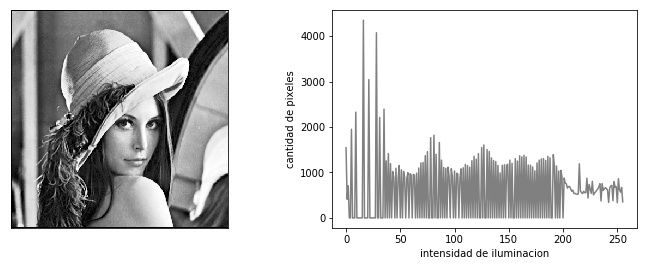

In [21]:
img = cv2.imread('lenaD.png', cv2.IMREAD_GRAYSCALE)
img = cv2.equalizeHist(img)

hist = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(img,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.plot(hist, color='gray' )
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()

## **Histogramas aplicando mascaras en las imagenes**

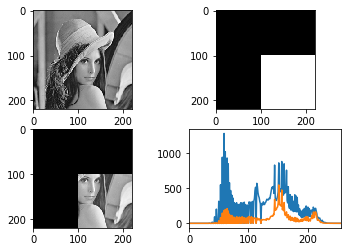

In [22]:
img = cv2.imread('lena.png',0)

# crear mascara
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calcular histograma con y sin mascara
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()